Η ομάδα μας έχοντας τον αριθμό 31 έχει αναλάβει να αντιμετωπίσει το πρόβλημα της παλιδρόμησης (regression) για το Big Dataset B07. To Dataset αυτό αντιστοιχεί στο [Communities and Crime Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime). 

# Ανάλυση Dataset

In [84]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_validate


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge,Lasso,ElasticNet,SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor


from sklearn.metrics import r2_score, mean_squared_error, make_scorer

pd.options.mode.chained_assignment = None

In [2]:
columns=["state"
,"county"
,"community"
,"communityname"
,"fold"
,"population"
,"householdsize"
,"racepctblack"
,"racePctWhite"
,"racePctAsian"
,"racePctHisp"
,"agePct12t21"
,"agePct12t29"
,"agePct16t24"
,"agePct65up"
,"numbUrban"
,"pctUrban"
,"medIncome"
,"pctWWage"
,"pctWFarmSelf"
,"pctWInvInc"
,"pctWSocSec"
,"pctWPubAsst"
,"pctWRetire"
,"medFamInc"
,"perCapInc"
,"whitePerCap"
,"blackPerCap"
,"indianPerCap"
,"AsianPerCap"
,"OtherPerCap"
,"HispPerCap"
,"NumUnderPov"
,"PctPopUnderPov"
,"PctLess9thGrade"
,"PctNotHSGrad"
,"PctBSorMore"
,"PctUnemployed"
,"PctEmploy"
,"PctEmplManu"
,"PctEmplProfServ"
,"PctOccupManu"
,"PctOccupMgmtProf"
,"MalePctDivorce"
,"MalePctNevMarr"
,"FemalePctDiv"
,"TotalPctDiv"
,"PersPerFam"
,"PctFam2Par"
,"PctKids2Par"
,"PctYoungKids2Par"
,"PctTeen2Par"
,"PctWorkMomYoungKids"
,"PctWorkMom"
,"NumIlleg"
,"PctIlleg"
,"NumImmig"
,"PctImmigRecent"
,"PctImmigRec5"
,"PctImmigRec8"
,"PctImmigRec10"
,"PctRecentImmig"
,"PctRecImmig5"
,"PctRecImmig8"
,"PctRecImmig10"
,"PctSpeakEnglOnly"
,"PctNotSpeakEnglWell"
,"PctLargHouseFam"
,"PctLargHouseOccup"
,"PersPerOccupHous"
,"PersPerOwnOccHous"
,"PersPerRentOccHous"
,"PctPersOwnOccup"
,"PctPersDenseHous"
,"PctHousLess3BR"
,"MedNumBR"
,"HousVacant"
,"PctHousOccup"
,"PctHousOwnOcc"
,"PctVacantBoarded"
,"PctVacMore6Mos"
,"MedYrHousBuilt"
,"PctHousNoPhone"
,"PctWOFullPlumb"
,"OwnOccLowQuart"
,"OwnOccMedVal"
,"OwnOccHiQuart"
,"RentLowQ"
,"RentMedian"
,"RentHighQ"
,"MedRent"
,"MedRentPctHousInc"
,"MedOwnCostPctInc"
,"MedOwnCostPctIncNoMtg"
,"NumInShelters"
,"NumStreet"
,"PctForeignBorn"
,"PctBornSameState"
,"PctSameHouse85"
,"PctSameCity85"
,"PctSameState85"
,"LemasSwornFT"
,"LemasSwFTPerPop"
,"LemasSwFTFieldOps"
,"LemasSwFTFieldPerPop"
,"LemasTotalReq"
,"LemasTotReqPerPop"
,"PolicReqPerOffic"
,"PolicPerPop"
,"RacialMatchCommPol"
,"PctPolicWhite"
,"PctPolicBlack"
,"PctPolicHisp"
,"PctPolicAsian"
,"PctPolicMinor"
,"OfficAssgnDrugUnits"
,"NumKindsDrugsSeiz"
,"PolicAveOTWorked"
,"LandArea"
,"PopDens"
,"PctUsePubTrans"
,"PolicCars"
,"PolicOperBudg"
,"LemasPctPolicOnPatr"
,"LemasGangUnitDeploy"
,"LemasPctOfficDrugUn"
,"PolicBudgPerPop"
,"ViolentCrimesPerPop"]

In [3]:
data=pd.read_csv('drive/My Drive/B07/communities.data',header=None,names=columns,na_values = ["?"])

In [4]:
data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0.30,0.06,0.46,0.41,0.49,0.50,0.27,0.00,0.16,0.36,0.52,0.01,0.16,0.08,0.11,0.65,0.12,0.71,0.17,...,0.39,0.41,0.41,0.50,0.48,0.39,0.00,0.00,0.22,0.28,0.34,0.48,0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.0,0.28,0.76,0.10,0.30,0.26,0.37,0.48,0.24,0.18,0.20,0.26,0.18,0.20,0.23,0.26,0.04,0.32,0.33,0.37,0.22,0.24,0.77,0.10,...,0.54,0.61,0.54,0.69,0.67,0.31,0.01,0.00,0

### Σύντομη παρουσίαση του dataset (τι περιγράφει).


To dataset μας περιέχει :



*   Κοινωνικά
*   Πολιτικα
*   Κτηματολογικα
*   Δημογραφικά

δεδομένα, που αφορούν συγκεκριμένες κοινότητες στις Ηνωμένες Πολιτείες της Αμερικής. Ορισμένα παραδείγματα χαρακτηριστικών είναι τα εξής :



*   Ποσοστό πληθυσμού που είναι 16-24 
*   Κατα κεφαλην εισόδημα κατοίκων με ισπανική καταγωγή
*   Ποσοστό ανδρών με διαζύγιο
*   Πλήθος κατοίκων που μένουν σε καταφύγιο αστέγων
*   Μέση ηλικία κτηρίων στην περιοχή
*   Πλήθος αστυνομικών αυτοκινήτων.

Ο στόχος και η πρόκληση του συγκεκριμένου dataset είναι να προβλέψουμε το πλήθος των εγκληματικών ενεργειών ανα 100Κ πληθυσμού.

### Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;

In [5]:
print("Αρχικός Αριθμός δειγμάτων:",data.shape[0])
print("Αρχικός Αριθμός χαρακτηριστικών:",data.shape[1])

Αρχικός Αριθμός δειγμάτων: 1994
Αρχικός Αριθμός χαρακτηριστικών: 128


Συμφωνα με τα χαρακτηριστικά του dataset έχω :



*   122 predictive attributes, τα οποία είναι όλα διατεταγμένες αριθμητικές τιμές και θα μας βοηθήσουν στην εκαίδευση του μοντέλου.
*   5 non-predictive attributes, τα οποία θα αφαιρεθούν
*   1 goal attribute το οποίο είναι διατεταγμένη και αριθμητική τιμή.

### Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;

 Χρειάστηκε να εισάγουμε χειροκίνητα τις επικεφαλίδες, φυσικά μέσα απο το site του dataset μας και να το τροποποιήσουμε κατάλληλα για να μπορεί να προσαρμοστεί στο dataframe μας. Συνεπώς, εν τέλη εχουμε επικεφαλίδες και αριθμήση γραμμών.

### Ποια / ποιες είναι οι κολόνες με τις μεταβλητές - στόχους;

Έχουμε μια κολόνα με μεταβλητή στόχο και αυτή είναι η **ViolentCrimesPerPop**.

### Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?


H μετατροπή που κάναμε στο αρχείο text μας αφορά τις απουσιάζουσες τιμές, οι οποίες εμφανίζονται ως "?" στο αρχικό αρχείο ενώ εμείς τις διαβάσαμε ως NaN.

Τέλος όπως αναφέραμε, κατασκευάσαμε χειροκίνητα την λίστα με τα χαρακτηριστικά.

Φυσικά θα ακολουθήσουν και άλλες ενέργειες που θα αφορούν την επεξεργασία αλλά και την μετατροπή των δεδομένων μας με σκοπό την καλύτερη εκπαίδευση των αλγορίθμων μας. Οι ενέργειες αυτές θα αναφερθούν παρακάτω μαζι με την υλοποίηση τους.

### Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου; 


Στο σημείο αυτό θα διαγράψουμε τις 5 στήλες χαρακτηριστικών που δεν θα χρειαστούμε και δεν δίνουν κάποια πληροφορία για να υπολογίσουμε τις απουσιάζουσες τιμές που όντως θα μας απασχολήσουν.

In [6]:
data = data.drop(data.columns[[0, 1, 2, 3, 4]], axis=1)

In [7]:
null_columns=data.columns[data.isnull().any()]
null_values=data[null_columns].isnull().sum()
null_values

OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64

In [8]:
sum=0
for i in range(len(null_values)):
  sum=sum+null_values[i]

print("Συνολικές Απουσιάζουσες Τιμές:",sum)
print("Ποσοστό Συνολικών Απουσιάζουσων Τιμών:",100*sum/(1994*128),"%")
print("Ποσοστό Απουσιάζουσων Τιμών στις <<Αδύναμες>> Στήλες:",100*1675/1994,"%")

Συνολικές Απουσιάζουσες Τιμές: 36851
Ποσοστό Συνολικών Απουσιάζουσων Τιμών: 14.438236584754263 %
Ποσοστό Απουσιάζουσων Τιμών στις <<Αδύναμες>> Στήλες: 84.00200601805416 %


In [9]:
l1=data[data['LemasSwornFT'].isnull()].index.tolist()
All_same=True
for attr in null_columns[1::]:
  l2=data[data[attr].isnull()].index.tolist()
  dif=list(set(l1) - set(l2))
  if dif:
    All_same=False
  
if (All_same): print("Τα ίδια indeces στις <<Αδύναμες>> Στήλες")
else: print("Διαφορετικά indeces στις <<Αδύναμες>> Στήλες")

Τα ίδια indeces στις <<Αδύναμες>> Στήλες


Βλέπουμε ότι έχουμε ένα υποσύνολο στηλών που για τα ίδια indeces έχουν απουσιάζουσες τιμές σε ποσοστό 84%. Ο τρόπος να το αντιμετωπίσουμε αυτο το συμβάν είναι να τις αφαιρέσουμε. Όπως επίσης θα αντικαταστήσουμε την μονδική απουσιάζουσα τιμή του OtherPerCap με το mean , μέσω ενός imputer. Όμως η ενέργεια αυτή πρέπει να πραγματοποιηθεί μετα το train-test split για να μην εισάγουμε πληροφορία στο test set.

In [10]:
data = data.drop(columns=null_columns[1::])
print(data.shape[0])
print(data.shape[1])

1994
101


### Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.

Αναφέρουμε στην προηγούμενη ερώτηση πως αντιμετωπίσαμε τις απουσιάζουσες τιμές. Στο στάδιο αυτό θα διαχωρίσουμε σε train-test set και θα εφαρμόσουμε τον imputer.

In [11]:
X = data.iloc[:, 0:100]
y = data.iloc[:, 100]

seed = 31

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [12]:
null_columns1=X_train.columns[X_train.isnull().any()]
null_columns1

Index(['OtherPerCap'], dtype='object')

Η απουσιάζουσα τιμή εμφανίζεται στο train set

In [13]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imp.fit(X_train[['OtherPerCap']])
X_train[['OtherPerCap']] = imputer.transform(X_train[['OtherPerCap']])

Έχοντας πλεον τελειώσει το πρώτο στάδιο ανάγνωσης και επεξεργασίας τηων δεδομένων μας, θα συνεχίσουμε με παραπάνω μετατροπές και εξαγωγές χαρακτηριστικών.

# Επεξεργασία Δεδομένων και Εξαγωγή Χαρακτηριστικών

Αρχικά παρατηρούμε ότι έχουμε 100 attributes, έναν αρκετά μεγάλο αριθμό τον οποίο ίσως θα χρειαστεί να μειώσουμε. Για την μειώση θα επιλέξουμε την τεχνική PCA. Αρχικά θα οπτικοποιήσουμε τις συσχετίσεις των attributes για να δούμε αν έχουμε υψηλές συσχετίσεις, γεγονός που καθιστά το PCA απαραίτητο.



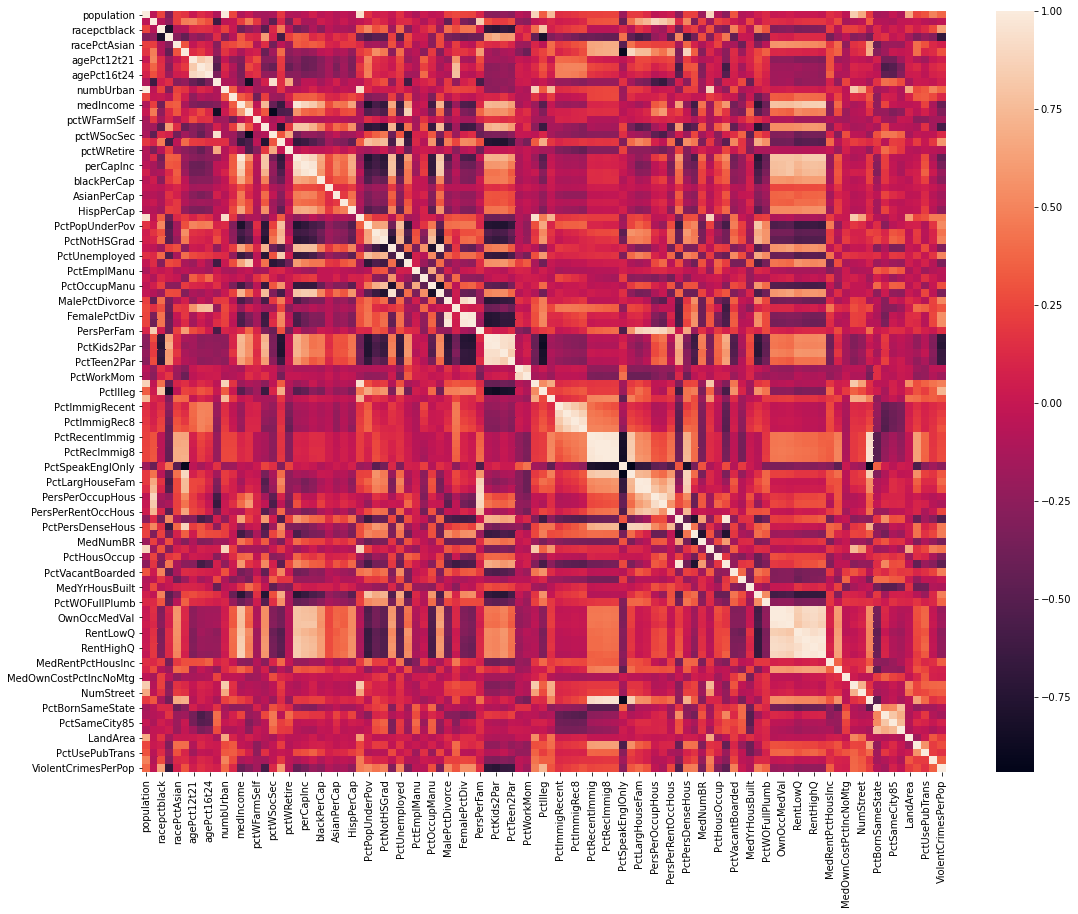

In [21]:
result = pd.concat([X_train, y_train], axis=1).corr()
fig, ax = plt.subplots(figsize = (18, 14))
sns.heatmap(result, annot = False)

Βλέπουμε αρκετές συσχετίσεις, επομένως θα εφαρμόσουμε PCA. Ακριβώς πριν την εφαρμογή του PCA ίσως χρειαστεί να κάνουμε κάποια τροποποίηση στα δεδομένα μας είτε με την μορφή Standardization είτε με την μορφή Normalization.

[0.24997485 0.42098734 0.51318639 0.59074327 0.64613443 0.68760684
 0.71910829 0.74863991 0.76899851 0.78513398 0.80024729 0.81476338
 0.82837552 0.83871217 0.84801943 0.85707147 0.86552462 0.87300145
 0.8799985  0.88649032 0.89293538 0.89885795 0.9042276  0.90941965
 0.91436431 0.91914313 0.92370301 0.92801784 0.93210057 0.93601213
 0.93971077 0.94324316 0.94655343 0.94963896 0.95259886 0.95533293
 0.95786353 0.96034935 0.96274837 0.96486775 0.966955   0.96901248
 0.97099587 0.97293692 0.9748024  0.97643506 0.97803874 0.97944542
 0.98078382 0.98203977 0.98321048 0.98431166 0.9853553  0.98636557
 0.98727888 0.9881131  0.98888006 0.9896139  0.99031188 0.99097409]


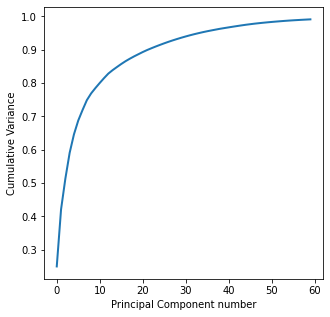

In [22]:
n = 60
pca = PCA(n_components=n)
stdT=StandardScaler()
stdTrain=stdT.fit_transform(X_train)
trainPCA = pca.fit_transform(stdTrain)

evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

Παρατηρούμε από το διάγραμμα ότι για πάνω από 23 συνιστώσες έχουμε κάλυψη του 90% της πληροφορίας.

[0.24891015 0.42249709 0.50239633 0.58066604 0.63216439 0.6731019
 0.70796387 0.73768582 0.75850199 0.7785477  0.79409786 0.80912804
 0.82269664 0.83453898 0.8459842  0.85568444 0.8641575  0.87229035
 0.88000085 0.88714605 0.89394169 0.90031266 0.90626289 0.91187191
 0.91725741 0.92253107 0.92723857 0.93148247 0.93552004 0.93918929
 0.94276813 0.94627054 0.94961158 0.95269066 0.95563005 0.95838185
 0.96086769 0.96331091 0.96568417 0.96783883 0.9699855  0.97195674
 0.97382362 0.97551621 0.97701251 0.97845251 0.9798076  0.98105122
 0.98224296 0.98336302 0.98439859 0.98540122 0.98630085 0.98716874
 0.98797552 0.98873535 0.98945431 0.99015933 0.99080797 0.99143317]


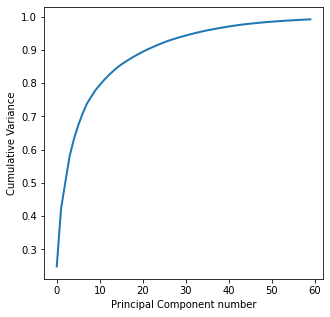

In [23]:
n = 60
pca = PCA(n_components=n)
norm=Normalizer()
normTrain=norm.fit_transform(X_train)
trainPCA = pca.fit_transform(normTrain)

evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

Παρατηρούμε από το διάγραμμα ότι για πάνω από 22 συνιστώσες έχουμε κάλυψη του 90% της πληροφορίας. Συνεπώς συνυπολογίζοντας και τις 2 περιπτώσεις θα θέσουμε τα compenents του PCA σαν υπερπαράμετρο για tuning στο έυρος [22,40], όπως επίσης θα θέσουμε υπερπαράμετρο το να εφαρμοστεί πριν απο το PCA normalization ή standardization.Tέλος ακόμα μια υπερπαράμετρο στην κατηγορία προεπεξεργασία και feature selection θα είναι το VarianceThreshold. Θα κοιτάξουμε το variance κάθε attribute έτσι ώστε να μπορέσουμε να θέσουμε κάποιο αρχικό range στις τιμές του threshold.

In [24]:
train_variance = X_train.var(axis=0)
print(train_variance)
print(np.max(train_variance))

population             0.015738
householdsize          0.027169
racepctblack           0.064190
racePctWhite           0.060247
racePctAsian           0.044506
                         ...   
PctSameState85         0.040798
LandArea               0.011210
PopDens                0.040881
PctUsePubTrans         0.049970
LemasPctOfficDrugUn    0.059358
Length: 100, dtype: float64
0.19764913118551541


# Linear Models

Για την συγκεκριμένη κατηγορία αλγορίθμων θα χρησιμοποιήσουμε τους εξής :



*   Ridge Regression
*   Lasso
*   ElasticNet



### Ridge Regression

Συνοπτικά ο Ridge αλγόριθμος ακολουθεί την λογική του Ordinary Least Squares, μόνο που για να αποφύγουμε το overfitting εισσάγουμε ένα penalty, το λεγόμενο L2 Regularization. Το penalty αυτό είναι η κύρια υπερπαράμετρος του συγκεκριμένου αλγορίθμου και αυτη θα μας απασχολήσει στην εφαρμογή του grid search CV. Η υπερπαράμετρος αυτή εμφανίζεται ως alpha. Ο τρόπος που επιλέξαμε το εύρος της υπερπαραμέτρου είναι μέσω δοκιμών, δηλαδή ορίσαμε ένα αρχικό εύρος, παρατηρήσαμε ότι τείνει το grid search να επιστρέφει τιμές που βρίσκονται στο άνω άκρο του έυρους και προσαρμόσαμε στην επόμενη δοκιμή κατάλληλα το εύρος.

In [131]:
threshold=[0,0.01,0.05,0.1,0.15]
components=[i for i in range(40,100,3)]
alpha=[0.5,1, 5, 10, 20, 40 , 60]
pipe = Pipeline(steps=[('variance',VarianceThreshold()),('preprocess',StandardScaler()),('pca', PCA()),('estimator', Ridge())])

params_grid = [
               {'variance__threshold': threshold,
                'preprocess':[StandardScaler()],
                'pca__n_components': components,
                'estimator__alpha': alpha
                },
                {'variance__threshold': threshold,
                'preprocess': [Normalizer()],
                'pca__n_components': components,
                'estimator__alpha': alpha
                },
               {'variance__threshold': threshold,
                'preprocess': [MinMaxScaler()],
                'pca__n_components': components,
                'estimator__alpha': alpha
               }               
]

grid = GridSearchCV(pipe, params_grid,cv=5,verbose=1,scoring="neg_mean_squared_error",n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 2100 candidates, totalling 10500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 10500 out of 10500 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('variance',
                                        VarianceThreshold(threshold=0.0)),
                                       ('preprocess',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('estimator',
                                        Ridge(alpha=1.0, copy_X=True,
                       

In [132]:
print(" Results from Grid Search for Ridge:" )

print("\n The best MSE ERROR across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)


 Results from Grid Search for Ridge:

 The best MSE ERROR across ALL searched params:
 -0.018768919968286668

 The best parameters across ALL searched params:
 {'estimator__alpha': 40, 'pca__n_components': 94, 'preprocess': StandardScaler(copy=True, with_mean=True, with_std=True), 'variance__threshold': 0}


##### Optimized Ridge

In [25]:
variance_thre=VarianceThreshold(threshold=0)
preprocess_method=StandardScaler()
pca=PCA(n_components=94)
ridge=Ridge(alpha=40)

fit_start = time.time()
X_train_var=variance_thre.fit_transform(X_train)
X_train_pre=preprocess_method.fit_transform(X_train_var)
X_train_pca=pca.fit_transform(X_train_pre)
ridge.fit(X_train_pca,y_train)
opt_rid_fit_time=time.time() - fit_start

opt_rid_train_pred=ridge.predict(X_train_pca)

pred_start=time.time()
X_test_var=variance_thre.transform(X_test)
X_test_pre=preprocess_method.transform(X_test_var)
X_test_pca=pca.transform(X_test_pre)
opt_rid_test_pred=ridge.predict(X_test_pca)
opt_rid_pred_time=time.time() - pred_start

In [26]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,opt_rid_train_pred))
print("R2 score: ",r2_score(y_train, opt_rid_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", opt_rid_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,opt_rid_test_pred))
print("R2 score: ",r2_score(y_test, opt_rid_test_pred))
print("Χρονος εκτέλεσης predict :", opt_rid_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  0.016903393335779046
R2 score:  0.6880587589467382
Χρονος εκτέλεσης τελικού fit : 0.034905433654785156 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.017898332737710753
R2 score:  0.6716247374115389
Χρονος εκτέλεσης predict : 0.00331878662109375 seconds


##### Non Optimized Ridge

In [27]:
rid=Ridge()

fit_start = time.time()
rid.fit(X_train,y_train)
nonopt_rid_fit_time=time.time() - fit_start

nonopt_rid_train_pred=rid.predict(X_train)

pred_start=time.time()
nonopt_rid_test_pred=rid.predict(X_test)
nonopt_rid_pred_time=time.time() - pred_start

In [28]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,nonopt_rid_train_pred))
print("R2 score: ",r2_score(y_train, nonopt_rid_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", nonopt_rid_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,nonopt_rid_test_pred))
print("R2 score: ",r2_score(y_test, nonopt_rid_test_pred))
print("Χρονος εκτέλεσης predict :", nonopt_rid_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  0.01681352514721068
R2 score:  0.6897172185066827
Χρονος εκτέλεσης τελικού fit : 0.011630535125732422 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.01786683643608226
R2 score:  0.6722025904702225
Χρονος εκτέλεσης predict : 0.0019376277923583984 seconds


### Lasso

Συνοπτικά ο Lasso αλγόριθμοε θυμίζει πολύ τον Ridge, διαφέρουν όμως στο είδος του penalty που εφαρμόζει ο καθένας. Ο Lasso εφαρμόζει τον L1 Regularization. Η πρακτική συνέπεια αυτής της διαφοράς είναι ότι πολλές φορες ο Lasso, μπορεί να οδηγήσει σε μηδενικά βάρη, δηλαδή να φανεί χρήσιμος και σε σαν τεχνική feature selection. Όμοίως , η υπερπαράμετρος του penalty είναι η alpha και θα την προσεγγίσουμε με τον ίδιο τρόπο όπως και στον Ridge αλγόριθμο.

In [32]:
threshold=[0,0.01,0.05,0.1,0.15]
components=[i for i in range(22,100,3)]
alpha=[1.15e-5,1.40e-5,1.70e-5, 1e-4,1.15e-4,1.40e-4,1e-3]
pipe = Pipeline(steps=[('variance',VarianceThreshold()),('preprocess',StandardScaler()),('pca', PCA()),('estimator', Lasso(random_state=0))])

params_grid = [{'variance__threshold': threshold,
                'preprocess':[StandardScaler()],
                'pca__n_components': components,
                'estimator__alpha': alpha
                },
                {'variance__threshold': threshold,
                'preprocess': [Normalizer()],
                'pca__n_components': components,
                'estimator__alpha': alpha
                },
               {'variance__threshold': threshold,
                'preprocess': [MinMaxScaler()],
                'pca__n_components': components,
                'estimator__alpha': alpha
                }
               
]

grid = GridSearchCV(pipe, params_grid,cv=5,verbose=1,scoring="neg_mean_squared_error",n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 2730 candidates, totalling 13650 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 6940 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 12540 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 13650 out of 13650 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('variance',
                                        VarianceThreshold(threshold=0.0)),
                                       ('preprocess',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('estimator',
                                        Lasso(alpha=1.0, copy_X=True,
                       

In [33]:
print(" Results from Grid Search for Lasso:" )

print("\n The best MSE ERROR across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)


 Results from Grid Search for Lasso:

 The best MSE ERROR across ALL searched params:
 -0.01873375153129813

 The best parameters across ALL searched params:
 {'estimator__alpha': 1.7e-05, 'pca__n_components': 94, 'preprocess': Normalizer(copy=True, norm='l2'), 'variance__threshold': 0}


##### Optimized Lasso

In [34]:
variance_thre=VarianceThreshold(threshold=0)
preprocess_method=Normalizer()
pca=PCA(n_components=94)
lasso=Lasso(alpha=1.7e-05)

fit_start = time.time()
X_train_var=variance_thre.fit_transform(X_train)
X_train_pre=preprocess_method.fit_transform(X_train_var)
X_train_pca=pca.fit_transform(X_train_pre)
lasso.fit(X_train_pca,y_train)
opt_las_fit_time=time.time() - fit_start

opt_las_train_pred=lasso.predict(X_train_pca)

pred_start=time.time()
X_test_var=variance_thre.transform(X_test)
X_test_pre=preprocess_method.transform(X_test)
X_test_pca=pca.transform(X_test_pre)
opt_las_test_pred=lasso.predict(X_test_pca)
opt_las_pred_time=time.time() - pred_start

In [35]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,opt_las_train_pred))
print("R2 score: ",r2_score(y_train, opt_las_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", opt_las_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,opt_las_test_pred))
print("R2 score: ",r2_score(y_test, opt_las_test_pred))
print("Χρονος εκτέλεσης predict :", opt_las_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  0.016865366020823242
R2 score:  0.688760528561016
Χρονος εκτέλεσης τελικού fit : 0.023484230041503906 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.018159500139095928
R2 score:  0.6668331785961912
Χρονος εκτέλεσης predict : 0.006083011627197266 seconds


##### Non Optimized Lasso

In [36]:
las=Lasso()

fit_start = time.time()
las.fit(X_train,y_train)
nonopt_las_fit_time=time.time() - fit_start

nonopt_las_train_pred=las.predict(X_train)

pred_start=time.time()
nonopt_las_test_pred=las.predict(X_test)
nonopt_las_pred_time=time.time() - pred_start

In [37]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,nonopt_las_train_pred))
print("R2 score: ",r2_score(y_train, nonopt_las_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", nonopt_las_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,nonopt_las_test_pred))
print("R2 score: ",r2_score(y_test, nonopt_las_test_pred))
print("Χρονος εκτέλεσης predict :", nonopt_las_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  0.054187747919143874
R2 score:  0.0
Χρονος εκτέλεσης τελικού fit : 0.005643367767333984 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.054526757309444826
R2 score:  -0.00038581872270881945
Χρονος εκτέλεσης predict : 0.002241849899291992 seconds


### ElasticNet

Ο αλγόριθμος ElasticNet συνδυάζει L1 και L2 Regularization και έχει 2 σημαντικές υπερπαραμέτρους. Το alpha, που αναφέρεται στο penalty για κάθε ένα απο τα L1 και L2, όπως επίσης και το l1_ratio, το οποίο είναι το βάρος που θα δοθεί σε κάθε ένα απο τα L1 (l1_ratio) και L2 (1-l1_ratio). Θα τεθεί ένα αρχικό έυρος για κάθε μια από τις υπερπαραμέτρους και θα προσαρμοστεί ανάλογα με τα αποτελέσματα. Ακόμα μια υπερπαράμετρος που θα θέσουμε προς βελτιστοποίηση είναι η "normlize" του ElasticNet , η οποία κανονικοποεί ή όχι την είσοδο. Φυσικά στις περιπτώσεις που έχουμε ήδη κάποιον normalizer θέτουμε την υπερπαράμετρο σε False

In [145]:
threshold=[0,0.01,0.05,0.1,0.15]
components=[i for i in range(22,100,3)]
alpha=[1.15e-5,1.40e-5,1.70e-5, 1e-4,1.15e-4,1.40e-4,1e-3]
l1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

pipe = Pipeline(steps=[('variance',VarianceThreshold()),('preprocess',StandardScaler()),('pca', PCA()),('estimator', ElasticNet(random_state=0))])

params_grid = [{'variance__threshold': threshold,
                'preprocess':[StandardScaler()],
                'pca__n_components': components,
                'estimator__alpha': alpha,
                'estimator__l1_ratio': l1,
                'estimator__normalize':[True,False]
                },
                {'variance__threshold': threshold,
                'preprocess': [Normalizer()],
                'pca__n_components': components,
                'estimator__alpha': alpha,
                 'estimator__l1_ratio': l1
                },
               {'variance__threshold': threshold,
                'preprocess': [MinMaxScaler()],
                'pca__n_components': components,
                'estimator__alpha': alpha,
                'estimator__l1_ratio': l1,
                }
               
]

grid = GridSearchCV(pipe, params_grid,cv=5,verbose=1,scoring="neg_mean_squared_error",n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 40040 candidates, totalling 200200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 3476 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6276 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 9876 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 14276 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 19476 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 25476 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 32276 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 39876 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 48276 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 57476 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 67476 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 78208 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 89740 

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('variance',
                                        VarianceThreshold(threshold=0.0)),
                                       ('preprocess',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('estimator',
                                        ElasticNet(alpha=1.0, copy_X=T...
                   

In [146]:
print(" Results from Grid Search for ElasticNet:" )

print("\n The best MSE ERROR across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)


 Results from Grid Search for ElasticNet:

 The best MSE ERROR across ALL searched params:
 -0.01873375153129813

 The best parameters across ALL searched params:
 {'estimator__alpha': 1.7e-05, 'estimator__l1_ratio': 1, 'pca__n_components': 94, 'preprocess': Normalizer(copy=True, norm='l2'), 'variance__threshold': 0}


##### Optimized ElasticNet

In [38]:
variance_thre=VarianceThreshold(threshold=0)
preprocess_method=Normalizer()
pca=PCA(n_components=34)
elastic=ElasticNet(alpha=1.7e-05,l1_ratio=1,normalize=False)

fit_start = time.time()
X_train_var=variance_thre.fit_transform(X_train)
X_train_pre=preprocess_method.fit_transform(X_train_var)
X_train_pca=pca.fit_transform(X_train_pre)
elastic.fit(X_train_pca,y_train)
opt_elas_fit_time=time.time() - fit_start

opt_elas_train_pred=elastic.predict(X_train_pca)

pred_start=time.time()
X_test_var=variance_thre.transform(X_test)
X_test_pre=preprocess_method.transform(X_test)
X_test_pca=pca.transform(X_test_pre)
opt_elas_test_pred=elastic.predict(X_test_pca)
opt_elas_pred_time=time.time() - pred_start

In [39]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,opt_elas_train_pred))
print("R2 score: ",r2_score(y_train, opt_elas_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", opt_elas_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,opt_elas_test_pred))
print("R2 score: ",r2_score(y_test, opt_elas_test_pred))
print("Χρονος εκτέλεσης predict :", opt_elas_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  0.01860323935869892
R2 score:  0.6566891950103242
Χρονος εκτέλεσης τελικού fit : 0.02575993537902832 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.019587841701859673
R2 score:  0.6406278307231833
Χρονος εκτέλεσης predict : 0.0032911300659179688 seconds


##### Non Optimzed ElasticNet

In [40]:
elastic=ElasticNet()

fit_start = time.time()
elastic.fit(X_train,y_train)
nonopt_elas_fit_time=time.time() - fit_start

nonopt_elas_train_pred=elastic.predict(X_train)

pred_start=time.time()
nonopt_elas_test_pred=elastic.predict(X_test)
nonopt_elas_pred_time=time.time() - pred_start

In [41]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,nonopt_elas_train_pred))
print("R2 score: ",r2_score(y_train, nonopt_elas_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", nonopt_elas_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,nonopt_elas_test_pred))
print("R2 score: ",r2_score(y_test, nonopt_elas_test_pred))
print("Χρονος εκτέλεσης predict :", nonopt_elas_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  0.054187747919143874
R2 score:  0.0
Χρονος εκτέλεσης τελικού fit : 0.008486032485961914 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.054526757309444826
R2 score:  -0.00038581872270881945
Χρονος εκτέλεσης predict : 0.0020592212677001953 seconds


# Stochastic Gradient Descent


Για την συγκεκριμένη κατηγορία αλγορίθμων θα χρησιμοποιήσουμε τον εξής :



*   Stochastic Gradient Descent regression




### Stochastic Gradient Descent regression

Παραπάνω είδαμε διάφορα γραμμικά μοντέλα, σε αυτή την κατηγορία θα προσπαθήσουμε να βελτιστοποιήσουμε τα γραμμικά μοντέλα ελαχιστοποιώντας το εμπειρικό σφάλμα με τη χρήση του αλγορίθμου SGD. Σημαντικές υπερπαράμετροι που θα ερευνηθούν είναι το loss, που υποδεικνύει ποιο loss function θα χρησιμοποιηθεί. Όπως επίσης το penalty που μπορεί να πάρει τιμές l1,l2,elastic , δηλαδή οι περιπτώσεις που έχουμε δει και παραπάνω, το alpha δηλαδή η τιμή που θα πολλαπλασιαστεί με το penalty.

In [20]:
threshold=[0,0.01,0.05,0.1,0.15]
components=[i for i in range(22,100,3)]
alpha=[1.15e-5,1.40e-5,1.70e-5, 1e-4,1.15e-4,1.40e-4,1e-3]
loss=['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive']
l1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
penal1=['l2', 'l1']
penal2=['elasticnet']



pipe = Pipeline(steps=[('variance',VarianceThreshold()),('preprocess',StandardScaler()),('pca', PCA()),('estimator', SGDRegressor())])

params_grid = [{'variance__threshold': threshold,
                'preprocess':[StandardScaler()],
                'pca__n_components': components,
                'estimator__alpha': alpha,
                'estimator__l1_ratio': l1,
                'estimator__loss':loss,
                'estimator__penalty':penal2
                },
               {'variance__threshold': threshold,
                'preprocess':[StandardScaler()],
                'pca__n_components': components,
                'estimator__alpha': alpha,
                'estimator__loss':loss,
                'estimator__penalty':penal1
                },
                {'variance__threshold': threshold,
                'preprocess': [Normalizer()],
                'pca__n_components': components,
                'estimator__alpha': alpha,
                'estimator__l1_ratio': l1,
                'estimator__loss':loss,
                'estimator__penalty':penal2
                },
               {'variance__threshold': threshold,
                'preprocess': [Normalizer()],
                'pca__n_components': components,
                'estimator__alpha': alpha,
                'estimator__loss':loss,
                'estimator__penalty':penal1
                },
               {'variance__threshold': threshold,
                'preprocess': [MinMaxScaler()],
                'pca__n_components': components,
                'estimator__alpha': alpha,
                'estimator__l1_ratio': l1,
                'estimator__loss':loss,
                'estimator__penalty':penal2
                },
               {'variance__threshold': threshold,
                'preprocess': [MinMaxScaler()],
                'pca__n_components': components,
                'estimator__alpha': alpha,
                'estimator__loss':loss,
                'estimator__penalty':penal1
                }
               
]

grid = GridSearchCV(pipe, params_grid,cv=5,verbose=1,scoring="neg_mean_squared_error",n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 141960 candidates, totalling 709800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 6760 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 12360 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 19560 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 28360 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 38760 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 50760 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 64360 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 79560 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 96360 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 114760 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 134760 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 156360 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 1

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('variance',
                                        VarianceThreshold(threshold=0.0)),
                                       ('preprocess',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('estimator',
                                        SGDRegressor(alpha=0.0001,
                          

In [21]:
print(" Results from Grid Search for ElasticNet:" )

print("\n The best MSE ERROR across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)


 Results from Grid Search for ElasticNet:

 The best MSE ERROR across ALL searched params:
 -0.018852409230790505

 The best parameters across ALL searched params:
 {'estimator__alpha': 1.4e-05, 'estimator__l1_ratio': 0, 'estimator__loss': 'squared_loss', 'estimator__penalty': 'elasticnet', 'pca__n_components': 97, 'preprocess': StandardScaler(copy=True, with_mean=True, with_std=True), 'variance__threshold': 0}


##### Optimized Stochastic Gradient Descent regression

In [42]:
variance_thre=VarianceThreshold(threshold=0)
preprocess_method=StandardScaler()
pca=PCA(n_components=97)
sgd=SGDRegressor(loss ='squared_loss',penalty ='elasticnet',alpha =1.4e-05,l1_ratio=0)

fit_start = time.time()
X_train_var=variance_thre.fit_transform(X_train)
X_train_pre=preprocess_method.fit_transform(X_train_var)
X_train_pca=pca.fit_transform(X_train_pre)
sgd.fit(X_train_pca,y_train)
opt_sgd_fit_time=time.time() - fit_start

opt_sgd_train_pred=sgd.predict(X_train_pca)

pred_start=time.time()
X_test_var=variance_thre.transform(X_test)
X_test_pre=preprocess_method.transform(X_test)
X_test_pca=pca.transform(X_test_pre)
opt_sgd_test_pred=sgd.predict(X_test_pca)
opt_sgd_pred_time=time.time() - pred_start

In [43]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,opt_sgd_train_pred))
print("R2 score: ",r2_score(y_train, opt_sgd_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", opt_sgd_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,opt_sgd_test_pred))
print("R2 score: ",r2_score(y_test, opt_sgd_test_pred))
print("Χρονος εκτέλεσης predict :", opt_sgd_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  0.01733703625757261
R2 score:  0.6800561580185611
Χρονος εκτέλεσης τελικού fit : 0.034369468688964844 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.018179420511054055
R2 score:  0.666467705595523
Χρονος εκτέλεσης predict : 0.0029511451721191406 seconds


##### Non Optimized Stochastic Gradient Descent regression

In [44]:
sgdr=SGDRegressor()

fit_start = time.time()
sgdr.fit(X_train,y_train)
nonopt_sgd_fit_time=time.time() - fit_start

nonopt_sgd_train_pred=sgdr.predict(X_train)

pred_start=time.time()
nonopt_sgd_test_pred=sgdr.predict(X_test)
nonopt_sgd_pred_time=time.time() - pred_start

In [45]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,nonopt_sgd_train_pred))
print("R2 score: ",r2_score(y_train, nonopt_sgd_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", nonopt_sgd_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,nonopt_sgd_test_pred))
print("R2 score: ",r2_score(y_test, nonopt_sgd_test_pred))
print("Χρονος εκτέλεσης predict :", nonopt_sgd_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  0.018964580710793526
R2 score:  0.6500208730008215
Χρονος εκτέλεσης τελικού fit : 0.012934207916259766 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.020085416423486317
R2 score:  0.6314989787644042
Χρονος εκτέλεσης predict : 0.0009288787841796875 seconds


# Neural Networks


Για την συγκεκριμένη κατηγορία αλγορίθμων θα χρησιμοποιήσουμε τον εξής :



*   **Multi-layer Perceptron** regression




### Multi-layer Perceptron regression

Η κατηγορία αυτή συνδυάζει πολλούς νευρώνες μαζί με συναρτήσεις ενεργοποίησης  αναμεσα στα στρώματα , και στο τέλος ορίζεται και η συνάρτηση βελτιστοποίηση βαρών. Όπως καταλαβαίνουμε έχει αρκετές σημαντικές παραμέτρους και πιθανόν το να θέσουμε όλες αυτές προς αναζήτηση δεν θα ήταν το βέλτιστο ως προς την χρονική πολυπλοκότητα. Συνεπώς αρχικά θα θέσουμε προς βελτιστοποίηση την υπερπαράμετρο hidden_layer_sizes, την activation και solver. Θα αφήσουμε τις υπόλοιπες στις default τιμές και όταν καταλήξουμε για τις παραπάνω θα δοκιμάσουμε να βελτιστοποιήσουμε και μερικές ακόμα όπως batch_size και learning_rate. Σε αυτό το notebook θα φανεί μόνο η τελική εκτέλεση του κώδικα με την τελική δοκιμή

In [14]:
threshold=[0]
components=[i for i in range(22,100,3)]
activation=['relu','tanh','logistic']
solver=['sgd','adam']
hid_lay_size=[(128,64,32,16,8),(256,128,64,32,16,8),(64,32,16,8)]

pipe = Pipeline(steps=[('variance',VarianceThreshold()),('preprocess',StandardScaler()),('pca', PCA()),('estimator', MLPRegressor())])

params_grid = {'variance__threshold': threshold,
                'preprocess':[StandardScaler(),Normalizer(),MinMaxScaler()],
                'pca__n_components': components,
                'estimator__activation': activation,
                'estimator__solver': solver,
                'estimator__hidden_layer_sizes':hid_lay_size
}
grid = GridSearchCV(pipe, params_grid,cv=5,verbose=1,scoring="neg_mean_squared_error",n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1404 candidates, totalling 7020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 59.8min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 65.4min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 74.6min
[Parallel(n_jobs=-1)]: Done 7020 out of 7020 | elapsed: 79.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('variance',
                                        VarianceThreshold(threshold=0.0)),
                                       ('preprocess',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('estimator',
                                        MLPRegressor(activation='relu...
                    

In [15]:
print(" Results from Grid Search for MLP:" )

print("\n The best MSE ERROR across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)


 Results from Grid Search for MLP:

 The best MSE ERROR across ALL searched params:
 -0.01853612297921203

 The best parameters across ALL searched params:
 {'estimator__activation': 'tanh', 'estimator__hidden_layer_sizes': (128, 64, 32, 16, 8), 'estimator__solver': 'adam', 'pca__n_components': 94, 'preprocess': Normalizer(copy=True, norm='l2'), 'variance__threshold': 0}


##### Optimized Multi-layer Perceptron

In [52]:
variance_thre=VarianceThreshold(threshold=0)
preprocess_method=Normalizer()
pca=PCA(n_components=34)
mlp=MLPRegressor(activation='tanh',solver='adam',hidden_layer_sizes=(128, 64, 32, 16, 8))

fit_start = time.time()
X_train_var=variance_thre.fit_transform(X_train)
X_train_pre=preprocess_method.fit_transform(X_train_var)
X_train_pca=pca.fit_transform(X_train_pre)
mlp.fit(X_train_pca,y_train)
opt_mlp_fit_time=time.time() - fit_start

opt_mlp_train_pred=mlp.predict(X_train_pca)

pred_start=time.time()
X_test_var=variance_thre.transform(X_test)
X_test_pre=preprocess_method.transform(X_test)
X_test_pca=pca.transform(X_test_pre)
opt_mlp_test_pred=mlp.predict(X_test_pca)
opt_mlp_pred_time=time.time() - pred_start

In [53]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,opt_mlp_train_pred))
print("R2 score: ",r2_score(y_train, opt_mlp_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", opt_mlp_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,opt_mlp_test_pred))
print("R2 score: ",r2_score(y_test, opt_mlp_test_pred))
print("Χρονος εκτέλεσης predict :", opt_mlp_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  0.018536867495414125
R2 score:  0.6579140450148644
Χρονος εκτέλεσης τελικού fit : 0.70395827293396 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.019550748952370835
R2 score:  0.6413083601072338
Χρονος εκτέλεσης predict : 0.006902217864990234 seconds


##### Non Optimized Multi-layer Perceptron

In [48]:
mlpr=MLPRegressor()

fit_start = time.time()
mlpr.fit(X_train,y_train)
nonopt_mlp_fit_time=time.time() - fit_start

nonopt_mlp_train_pred=mlpr.predict(X_train)

pred_start=time.time()
nonopt_mlp_test_pred=mlpr.predict(X_test)
nonopt_mlp_pred_time=time.time() - pred_start

In [49]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,nonopt_mlp_train_pred))
print("R2 score: ",r2_score(y_train, nonopt_mlp_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", nonopt_mlp_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,nonopt_mlp_test_pred))
print("R2 score: ",r2_score(y_test, nonopt_mlp_test_pred))
print("Χρονος εκτέλεσης predict :", nonopt_mlp_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  0.015299712582429827
R2 score:  0.7176536547475776
Χρονος εκτέλεσης τελικού fit : 0.5310478210449219 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.018859737863072747
R2 score:  0.6539861302227548
Χρονος εκτέλεσης predict : 0.001692056655883789 seconds


# Boosting - Ensemble methods

Για την συγκεκριμένη κατηγορία αλγορίθμων θα χρησιμοποιήσουμε τους εξής :



*   ExtraTreesRegressor
*   GradientBoostingRegressor




### ExtraTreesRegressor

Αποτελεί εναν meta estimator καθώς συνδυάζει πολλά Randomized Decision Trees για την βελτιστοποίηση της τελικής πρόβλεψης. Σημαντικές υπερπαραμέτρους που θα θέσουμε προς βελτιστοποίηση είναι ο αριθμός των estimators δηλαδή πόσα Decision Trees θα συμμετάσχουν στο συνολικό μοντέλο, ο αριθμός των χαρακτηριστικών που θα λαμβάνει υπόψη κάθε δέντρο για να επιτύχει το βέλτιστο split, τον ελάχιστο αριθμό από samples που θα πρέπει να έχει ένα split για να θεωρηθεί ως node και να ληφθεί υπόψην όπως επίσης και τον ελάχιστο αριθμό από samples που χρειάζεται ένα node leaf να χωριστεί στα 2.

Σε αυτή την περίπτωση θα χρησιμοποιήσουμε την εμπειρία μας από τα προηγούμενα αποτελέσματα και θα χρησιμοποιήσουμε την προεπεξεργασία που έχει χρησιμοποιηθεί απο την πλειοψηφία των προηγούμενων grid, δηλαδή threshold=0, components=97 και preprocess=StandardScalar.

Αυτό γίνεται καθώς η χρονική πολυπλοκότητα έχει αυξηθεί πολύ με την προσθήκη όλων των υπερπαραμέτρων.

In [16]:
threshold=[0]
components=[97]
estimators=range(50,126,25)
max_features=range(20,100,20)
min_samples_leaf= range(20,50,5)
min_samples_split= range(15,36,5)


pipe = Pipeline(steps=[('variance',VarianceThreshold()),('preprocess',StandardScaler()),('pca', PCA()),('estimator', ExtraTreesRegressor())])

params_grid = {'variance__threshold': threshold,
                'pca__n_components': components,
               'estimator__n_estimators': estimators,
               'estimator__max_features':max_features,
               'estimator__min_samples_leaf':min_samples_leaf,
               'estimator__min_samples_split':min_samples_split
                
}
grid = GridSearchCV(pipe, params_grid,cv=5,verbose=1,scoring="neg_mean_squared_error",n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  8.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('variance',
                                        VarianceThreshold(threshold=0.0)),
                                       ('preprocess',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('estimator',
                                        ExtraTreesRegressor(bootstrap...
             iid='de

In [17]:
print(" Results from Grid Search for ExtraTreesRegressor:" )

print("\n The best MSE ERROR across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)


 Results from Grid Search for ExtraTreesRegressor:

 The best MSE ERROR across ALL searched params:
 -0.023437894610755496

 The best parameters across ALL searched params:
 {'estimator__max_features': 80, 'estimator__min_samples_leaf': 20, 'estimator__min_samples_split': 20, 'estimator__n_estimators': 125, 'pca__n_components': 97, 'variance__threshold': 0}


##### Optimized ExtraTreesRegressor

In [69]:
variance_thre=VarianceThreshold(threshold=0)
preprocess_method=StandardScaler()
pca=PCA(n_components=97)
xtrreg=ExtraTreesRegressor(n_estimators=125,max_features=80,min_samples_leaf=20,min_samples_split=20)

fit_start = time.time()
X_train_var=variance_thre.fit_transform(X_train)
X_train_pre=preprocess_method.fit_transform(X_train_var)
X_train_pca=pca.fit_transform(X_train_pre)
xtrreg.fit(X_train_pca,y_train)
opt_xtrreg_fit_time=time.time() - fit_start

opt_xtrreg_train_pred=xtrreg.predict(X_train_pca)

pred_start=time.time()
X_test_var=variance_thre.transform(X_test)
X_test_pre=preprocess_method.transform(X_test)
X_test_pca=pca.transform(X_test_pre)
opt_xtrreg_test_pred=xtrreg.predict(X_test_pca)
opt_xtrreg_pred_time=time.time() - pred_start

In [70]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,opt_xtrreg_train_pred))
print("R2 score: ",r2_score(y_train, opt_xtrreg_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", opt_xtrreg_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,opt_xtrreg_test_pred))
print("R2 score: ",r2_score(y_test, opt_xtrreg_test_pred))
print("Χρονος εκτέλεσης predict :", opt_xtrreg_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  0.017807938399197788
R2 score:  0.6713659621770983
Χρονος εκτέλεσης τελικού fit : 0.7882816791534424 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.02236956794846772
R2 score:  0.5895923460182563
Χρονος εκτέλεσης predict : 0.01724863052368164 seconds


##### Non Optimized ExtraTreesRegressor

In [57]:
xtrreg1=ExtraTreesRegressor()

fit_start = time.time()
xtrreg1.fit(X_train,y_train)
nonopt_xtrreg_fit_time=time.time() - fit_start

nonopt_xtrreg_train_pred=xtrreg1.predict(X_train)

pred_start=time.time()
nonopt_xtrreg_test_pred=xtrreg1.predict(X_test)
nonopt_xtrreg_pred_time=time.time() - pred_start

In [58]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,nonopt_xtrreg_train_pred))
print("R2 score: ",r2_score(y_train, nonopt_xtrreg_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", nonopt_xtrreg_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,nonopt_xtrreg_test_pred))
print("R2 score: ",r2_score(y_test, nonopt_xtrreg_test_pred))
print("Χρονος εκτέλεσης predict :", nonopt_xtrreg_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  1.8078529303422585e-31
R2 score:  1.0
Χρονος εκτέλεσης τελικού fit : 2.489067554473877 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.017990996867167916
R2 score:  0.6699246568348203
Χρονος εκτέλεσης predict : 0.014549732208251953 seconds


### GradientBoostingRegressor

Ο αλγόριθμος αυτός είναι παρόμοιος με τον ExtraTreesRegressor που χρησιμοποιήσαμε παραπάνω μόνο που για την προσαρμογή των βαρών χρησιμοποιεί το gradient της loss function που επιλέγεται να χρησιμοποιηθεί. Οι βασικές υπερπαράμετροι είναι αυτές που χρησιμοποιήσαμε και στον ExtraTreesRegressor και επιπλέον θα αναζητήσουμε την βέλτιστη αρχιτεκτονική στις εξής υπερπαραμέτρους :
loss : συνάρτηση σφάλματος, learning_rate.

Ομοίως με την προηγούμενη περίπτωση θέτουμε εμείς την προεπεξεργασία και δεν την θεωρούμε υπερπαράμετρο. Επίσης, η αρχική σκέψη ήταν να θέσουμε ξανά όλες τις υπερπαραμέτρους προς αναζήτηση , αλλά έπειδη απο ~5ωρες αναζήτηση αποφασίσαμε να θέσουμε τις κοινές υπερπαραμέτρους με την ίδια τιμή και να κάνουμε αναζήτησ μόνο στις νέες.

In [91]:
threshold=[0]
components=[97]
estimators=[125]
max_features= [80]
min_samples_leaf= [20]
min_samples_split= [20]
loss=['ls', 'lad', 'huber', 'quantile']
learning_rate=[0.0001,0.0005,0.001,0.005,0.1,0.15]



pipe = Pipeline(steps=[('variance',VarianceThreshold()),('preprocess',StandardScaler()),('pca', PCA()),('estimator', GradientBoostingRegressor())])

params_grid = {'variance__threshold': threshold,
                'pca__n_components': components,
               'estimator__n_estimators': estimators,
               'estimator__max_features':max_features,
               'estimator__min_samples_leaf':min_samples_leaf,
               'estimator__min_samples_split':min_samples_split,
               'estimator__loss':loss,
               'estimator__learning_rate':learning_rate,

                
}
grid = GridSearchCV(pipe, params_grid,cv=5,verbose=1,scoring="neg_mean_squared_error",n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('variance',
                                        VarianceThreshold(threshold=0.0)),
                                       ('preprocess',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('estimator',
                                        GradientBoostingRegressor(alp...
                    

In [92]:
print(" Results from Grid Search for GradientBoostingRegressor:" )

print("\n The best MSE ERROR across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)


 Results from Grid Search for GradientBoostingRegressor:

 The best MSE ERROR across ALL searched params:
 -0.021334827834544396

 The best parameters across ALL searched params:
 {'estimator__learning_rate': 0.1, 'estimator__loss': 'ls', 'estimator__max_features': 80, 'estimator__min_samples_leaf': 20, 'estimator__min_samples_split': 20, 'estimator__n_estimators': 125, 'pca__n_components': 97, 'variance__threshold': 0}


##### Optimized GradientBoostingRegressor

In [65]:
variance_thre=VarianceThreshold(threshold=0)
preprocess_method=StandardScaler()
pca=PCA(n_components=97)
gbr=GradientBoostingRegressor(n_estimators=125,max_features=80,min_samples_leaf=20,min_samples_split=20,loss="ls",learning_rate=0.1)

fit_start = time.time()
X_train_var=variance_thre.fit_transform(X_train)
X_train_pre=preprocess_method.fit_transform(X_train_var)
X_train_pca=pca.fit_transform(X_train_pre)
gbr.fit(X_train_pca,y_train)
opt_gbr_fit_time=time.time() - fit_start

opt_gbr_train_pred=gbr.predict(X_train_pca)

pred_start=time.time()
X_test_var=variance_thre.transform(X_test)
X_test_pre=preprocess_method.transform(X_test)
X_test_pca=pca.transform(X_test_pre)
opt_gbr_test_pred=gbr.predict(X_test_pca)
opt_gbr_pred_time=time.time() - pred_start

In [66]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,opt_gbr_train_pred))
print("R2 score: ",r2_score(y_train, opt_gbr_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", opt_gbr_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,opt_gbr_test_pred))
print("R2 score: ",r2_score(y_test, opt_gbr_test_pred))
print("Χρονος εκτέλεσης predict :", opt_gbr_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  0.007994881528903552
R2 score:  0.8524596087507992
Χρονος εκτέλεσης τελικού fit : 4.2110724449157715 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.018954575744466528
R2 score:  0.6522461684809326
Χρονος εκτέλεσης predict : 0.00420689582824707 seconds


##### Non Optimized GradientBoostingRegressor

In [67]:
gbr1=GradientBoostingRegressor()

fit_start = time.time()
gbr1.fit(X_train,y_train)
nonopt_gbr_fit_time=time.time() - fit_start

nonopt_gbr_train_pred=gbr1.predict(X_train)

pred_start=time.time()
nonopt_gbr_test_pred=gbr1.predict(X_test)
nonopt_gbr_pred_time=time.time() - pred_start

In [68]:
print("___________________________ TRAINING SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_train,nonopt_gbr_train_pred))
print("R2 score: ",r2_score(y_train, nonopt_gbr_train_pred))
print("Χρονος εκτέλεσης τελικού fit :", nonopt_gbr_fit_time,"seconds \n\n\n")



print("___________________________ TEST SET ___________________________\n")
print("MSE error: ",mean_squared_error(y_test,nonopt_gbr_test_pred))
print("R2 score: ",r2_score(y_test, nonopt_gbr_test_pred))
print("Χρονος εκτέλεσης predict :", nonopt_gbr_pred_time,"seconds")

___________________________ TRAINING SET ___________________________

MSE error:  0.007857851472173815
R2 score:  0.8549884102233056
Χρονος εκτέλεσης τελικού fit : 1.9940714836120605 seconds 



___________________________ TEST SET ___________________________

MSE error:  0.018643697890629002
R2 score:  0.6579497498358456
Χρονος εκτέλεσης predict : 0.0015175342559814453 seconds


# Τελικά Αποτελέσματα

In [81]:
table = {'Algorithm': [' Opt Ridge regression','Non Opt Ridge regression',' Opt Lasso','Non Opt Lasso','Opt Elastic-Net','Non Opt Elastic-Net',
                       'Opt Stochastic Gradient Descent regression', 'Non Opt Stochastic Gradient Descent regression','Opt Multi-layer Perceptron regression',
                       'Non Opt Multi-layer Perceptron regression','Opt ExtraTreesRegressor','Non Opt ExtraTreesRegressor',
                       'Opt GradientBoostingRegressor','Non Opt GradientBoostingRegressor'],
        'MSE Training': [mean_squared_error(y_train,opt_rid_train_pred),
                        mean_squared_error(y_train,nonopt_rid_train_pred),
                        mean_squared_error(y_train,opt_las_train_pred),
                        mean_squared_error(y_train,nonopt_las_train_pred),
                        mean_squared_error(y_train,opt_elas_train_pred),
                        mean_squared_error(y_train,nonopt_elas_train_pred),
                        mean_squared_error(y_train,opt_sgd_train_pred),
                        mean_squared_error(y_train,nonopt_sgd_train_pred),
                        mean_squared_error(y_train,opt_mlp_train_pred),
                        mean_squared_error(y_train,nonopt_mlp_train_pred),
                        mean_squared_error(y_train,opt_xtrreg_train_pred),
                        mean_squared_error(y_train,nonopt_xtrreg_train_pred),
                        mean_squared_error(y_train,opt_gbr_train_pred),
                        mean_squared_error(y_train,nonopt_gbr_train_pred)],
         'MSE Test': [mean_squared_error(y_test,opt_rid_test_pred),
                      mean_squared_error(y_test,nonopt_rid_test_pred),
                      mean_squared_error(y_test,opt_las_test_pred),
                      mean_squared_error(y_test,nonopt_las_test_pred),
                      mean_squared_error(y_test,opt_elas_test_pred),
                      mean_squared_error(y_test,nonopt_elas_test_pred),
                      mean_squared_error(y_test,opt_sgd_test_pred),
                      mean_squared_error(y_test,nonopt_sgd_test_pred),
                      mean_squared_error(y_test,opt_mlp_test_pred),
                      mean_squared_error(y_test,nonopt_mlp_test_pred),
                      mean_squared_error(y_test,opt_xtrreg_test_pred),
                      mean_squared_error(y_test,nonopt_xtrreg_test_pred),
                      mean_squared_error(y_test,opt_gbr_test_pred),
                      mean_squared_error(y_test,nonopt_gbr_test_pred)],
         'Time Fit': [opt_rid_fit_time,
                      nonopt_rid_fit_time,
                      opt_las_fit_time,
                      nonopt_las_fit_time,
                      opt_elas_fit_time,
                      nonopt_elas_fit_time,
                      opt_sgd_fit_time,
                      nonopt_sgd_fit_time,
                      opt_mlp_fit_time,
                      nonopt_mlp_fit_time,
                      opt_xtrreg_fit_time,
                      nonopt_xtrreg_fit_time,
                      opt_gbr_fit_time,
                      nonopt_gbr_fit_time],
         'Time Predict': [opt_rid_pred_time,
                          nonopt_rid_pred_time,
                          opt_las_pred_time,
                          nonopt_las_pred_time,
                          opt_elas_pred_time,
                          nonopt_elas_pred_time,
                          opt_sgd_pred_time,
                          nonopt_sgd_pred_time,
                          opt_mlp_pred_time,
                          nonopt_mlp_pred_time,
                          opt_xtrreg_pred_time,
                          nonopt_xtrreg_pred_time,
                          opt_gbr_pred_time,
                          nonopt_gbr_pred_time]
        }

grad={ 'Algorithm':['Ridge regression','Lasso','Elastic-Net','Stochastic Gradient Descent regression','Multi-layer Perceptron regression','ExtraTreesRegressor',
                       'GradientBoostingRegressor'],
      'Performance Change Training %':[(mean_squared_error(y_train,nonopt_rid_train_pred)-mean_squared_error(y_train,opt_rid_train_pred))*100/mean_squared_error(y_train,nonopt_rid_train_pred),
(mean_squared_error(y_train,nonopt_las_train_pred)-mean_squared_error(y_train,opt_las_train_pred))*100/mean_squared_error(y_train,nonopt_las_train_pred),
(mean_squared_error(y_train,nonopt_elas_train_pred)-mean_squared_error(y_train,opt_elas_train_pred))*100/mean_squared_error(y_train,nonopt_elas_train_pred),
(mean_squared_error(y_train,nonopt_sgd_train_pred)-mean_squared_error(y_train,opt_sgd_train_pred))*100/mean_squared_error(y_train,nonopt_sgd_train_pred),
(mean_squared_error(y_train,nonopt_mlp_train_pred)-mean_squared_error(y_train,opt_mlp_train_pred))*100/mean_squared_error(y_train,nonopt_mlp_train_pred),
(mean_squared_error(y_train,nonopt_xtrreg_train_pred)-mean_squared_error(y_train,opt_xtrreg_train_pred))*100/mean_squared_error(y_train,nonopt_xtrreg_train_pred),
(mean_squared_error(y_train,nonopt_gbr_train_pred)-mean_squared_error(y_train,opt_gbr_train_pred))*100/mean_squared_error(y_train,nonopt_gbr_train_pred)
                        ],
      'Performance Change Test %':[(mean_squared_error(y_test,nonopt_rid_test_pred)-mean_squared_error(y_test,opt_rid_test_pred))*100/mean_squared_error(y_test,nonopt_rid_test_pred),
(mean_squared_error(y_test,nonopt_las_test_pred)-mean_squared_error(y_test,opt_las_test_pred))*100/mean_squared_error(y_test,nonopt_las_test_pred),
(mean_squared_error(y_test,nonopt_elas_test_pred)-mean_squared_error(y_test,opt_elas_test_pred))*100/mean_squared_error(y_test,nonopt_elas_test_pred),
(mean_squared_error(y_test,nonopt_sgd_test_pred)-mean_squared_error(y_test,opt_sgd_test_pred))*100/mean_squared_error(y_test,nonopt_sgd_test_pred),
(mean_squared_error(y_test,nonopt_mlp_test_pred)-mean_squared_error(y_test,opt_mlp_test_pred))*100/mean_squared_error(y_test,nonopt_mlp_test_pred),
(mean_squared_error(y_test,nonopt_xtrreg_test_pred)-mean_squared_error(y_test,opt_xtrreg_test_pred))*100/mean_squared_error(y_test,nonopt_xtrreg_test_pred),
(mean_squared_error(y_test,nonopt_gbr_test_pred)-mean_squared_error(y_test,opt_gbr_test_pred))*100/mean_squared_error(y_test,nonopt_gbr_test_pred)
                        ]    
}
table_df=pd.DataFrame(data=table)
grad_df=pd.DataFrame(data=grad)
table_df


,Algorithm,MSE Training,MSE Test,Time Fit,Time Predict
0,Opt Ridge regression,1.690339e-02,0.017898,0.034905,0.003319
1,Non Opt Ridge regression,1.681353e-02,0.017867,0.011631,0.001938
2,Opt Lasso,1.686537e-02,0.018160,0.023484,0.006083
3,Non Opt Lasso,5.418775e-02,0.054527,0.005643,0.002242
4,Opt Elastic-Net,1.860324e-02,0.019588,0.025760,0.003291
5,Non Opt Elastic-Net,5.418775e-02,0.054527,0.008486,0.002059
6,Opt Stochastic Gradient Descent regression,1.733704e-02,0.018179,0.034369,0.002951
7,Non Opt Stochastic Gradient Descent regression,1.896458e-02,0.020085,0.012934,0.000929
8,Opt Multi-layer Perceptron regression,1.853687e-02,0.019551,0.703958,0.006902
9,Non Opt Multi-layer Perceptron regression,1.529971e-02,0.018860,0.531048,0.001692


In [82]:
grad_df

,Algorithm,Performance Change Training %,Performance Change Test %
0,Ridge regression,-5.344994e-01,-0.176284
1,Lasso,6.887605e+01,66.696167
2,Elastic-Net,6.566892e+01,64.076643
3,Stochastic Gradient Descent regression,8.582022e+00,9.489452
4,Multi-layer Perceptron regression,-2.115827e+01,-3.663949
5,ExtraTreesRegressor,-9.850325e+30,-24.337568
6,GradientBoostingRegressor,-1.743862e+00,-1.667469


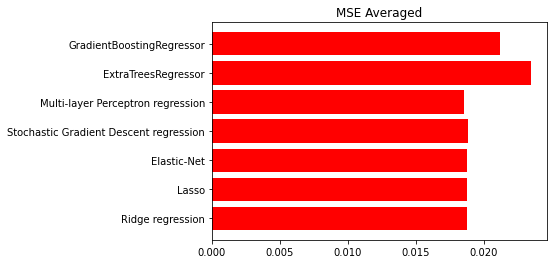

In [79]:
averaged_cv_mse = [0.018768919968286668,
0.01873375153129813,
0.01873375153129813,
0.018852409230790505,
0.01853612297921203,
0.023437894610755496,
0.021175078853048333]
algos=['Ridge regression','Lasso','Elastic-Net','Stochastic Gradient Descent regression','Multi-layer Perceptron regression','ExtraTreesRegressor',
                       'GradientBoostingRegressor']
y_pos = np.arange(len(averaged_cv_mse))
plt.barh(y_pos, averaged_cv_mse, align='center',color='red')
plt.yticks(y_pos, algos)
plt.title('MSE Averaged')
plt.show()

# Σχολιασμός



*   Αρχικά να αναφέρουμε πως παρατηρούμε σε ορισμένες περιπτώσεις μείωση της απόδοσης τόσο στο train όσο και στο test set. Σε περιπτώσεις που η μείωση είναι αρκετά μικρή δεν μας απασχολεί ιδιαίτερα καθώς πρέπει να υπενθυμίσουμε ότι το μοντέλο που επιλέγεται από τον grid search έχει επιλεχθεί απο 5-fold cross validation error, δηλαδή έχει εξεταστεί σε μεγαλύτερη ποικιλία και είναι αρκετά πιθανό αν επιλεχθεί ένα διαφορετικό test σετ να μας οδηγήσει σε ίσως καλύτερα αποτελέσματα. Η αξιοσημείωτη περίπτωση που η μείωση είναι πολύ μεγάλη είναι του ExtraTreesRegressor, το μοντέλο αυτό παρατηρήσαμε ότι οδηγεί σε πάρα πολύ καλά αποτελέσματα στη non optimised μορφή του. Το συγκεκριμένο μοντέλο θα εξεταστεί ξεχωριστά παρακάτω , για να παρατηρήσουμε καλύτερα τη συμπεριφορά του.
*   Ένα αίτιο που ορισμένους αλγορίθμους δεν καταφέραμε να βελτιστοποιήσουμε είναι καθώς δεν θέσαμε όλες τις διαθέσιμες υπερπαραμέτρους στο gridsearch όπως επίσης δεν θέσαμε όλα τα πιθανά εύρη. Αυτη η επιλογή πάρθηκε καθαρά για λόγους χρονικής πολυπλοκότητας.
*   Στα θετικά του optimization που πραγματοποιήσαμε είχαμε πολύ μεγάλη βελτίωση στους αλγορίθμους Lasso και ElasticNet τάξης του 66%
*    Οι χρόνοι τόσο των Linear μοντέλων, οσο και του SGD είναι αρκετά μειωμένοι, ενώ οι χρόνοι που αφορούν το MLP και τα Boosting-Ensamble μοντέλα είναι ελαφρώς αυξημένοι. Αυτό οφείλεται στο γεγονός ότι τα μοντέλα αυτά, έχουν είτε πολλαπλά στρώματα είτε πολλαπλούς estimators.
* Στη σημείο αυτό επιθυμούμε να καταλήξουμε σε ένα τελικό μοντέλο για να προτείνουμε για το συγκεκριμένο πρόβλημα παλινδρόμησης. Σύμφωνα με τα αποτελέσματα του Cross validation προκύπτει ότι το MLP έχει την καλύτερη απόδοση για πολύ μικρή διαφορά, αλλά σύμφωνα με το Test Set τόσο ο Ridge Regressor όσο και ο Non Opt ExtraTreesRegressor επιτυγχάνουν τα βέλτιστα αποτελέσματα. Θα πραγματοποήσουμε ένα kfold cross validation στον Non Opt ExtraTreesRegressor για να έχουμε μια πιο πλήρη εικόνα.



In [89]:
reg = ExtraTreesRegressor()
scores = cross_validate(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error',verbose=4,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.8s finished


In [90]:
scores

{'fit_time': array([2.84350133, 2.87142491, 2.86084652, 2.84727883, 1.98895979]),
 'score_time': array([0.02057195, 0.02246737, 0.0194428 , 0.02347875, 0.01248527]),
 'test_score': array([-0.01729989, -0.02222294, -0.02117555, -0.01965679, -0.01491544])}

Δεν παρατηρούμε κάποια έντονη διαφορά με τους υπόλοιπους αλγορίθμους , συνεπώς η τελική μας επιλογή για το συγκεκριμένο πρόβλημα είναι το παρακάτω pipeline :

*  StandardScaler()
*  PCA(n_components=94)
*  Ridge(alpha=40)